# <center>Network Analysis II</center>

```
pip install networkx==2.2
conda install -c anaconda networkx
```

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## 1. Loading Graphs

- Standard files: txt, csv
- Graph formats: GML, gexf
- Python objects: Numpy array, dicts, DataFrame, lists of lists

### 1.1 Adjacency Matrix 

<img src="https://github.com/christine62/python-tutorial/blob/master/image/network2.1.png?raw=true">

In [2]:
G_mat = np.array([[0, 1, 0, 0, 0, 0],
                  [1, 0, 1, 1, 0, 0],
                  [0, 1, 0, 1, 0, 0],
                  [0, 1, 1, 0, 1, 1],
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0, 0]])
G_mat

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]])

In [3]:
G1 = nx.from_numpy_array(G_mat, create_using=nx.Graph)
G1.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])

In [4]:
G1 = nx.Graph(G_mat)
G1.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])

### 1.2 Adjacency List
- In an adjacency list for every node, we maintain a list of all the nodes that it is connected to

<img src='https://github.com/christine62/python-tutorial/blob/master/image/network2.2.png?raw=true'>

In [5]:
file = open("G_adjlist.txt", "r") 
print (file.read()) 

1 2
2 1 3 4
3 2 4
4 2 3 5 6
5 4
6 4



In [6]:
G2 = nx.read_adjlist('G_adjlist.txt')
G2.edges()


EdgeView([('1', '2'), ('2', '3'), ('2', '4'), ('3', '4'), ('4', '5'), ('4', '6')])

### 1.3 Edge List
- In this representation, each element is an edge and is usually represented as (𝑢,𝑣), denoting that node u is connected to node v via an edge  
<img src="https://github.com/christine62/python-tutorial/blob/master/image/network2.3.png?raw=true" width=70%>

In [7]:
file = open("G_edgelist.txt", "r") 
print (file.read()) 

1 2 
2 3 
2 4 
3 4 
4 5 
4 6 



In [8]:
G3 = nx.read_edgelist('G_edgelist.txt',create_using=nx.DiGraph)
G3.edges()

OutEdgeView([('1', '2'), ('2', '3'), ('2', '4'), ('3', '4'), ('4', '5'), ('4', '6')])

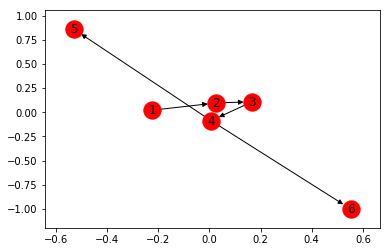

In [9]:
nx.draw_networkx(G3)
plt.show()

In [10]:
file = open("G_wedgelist.txt", "r") 
print (file.read()) 

1 2 4 
2 3 3 
2 4 5 
3 4 1 
4 5 2 
4 6 1 



In [11]:
G4 = nx.read_edgelist('G_wedgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

EdgeDataView([('1', '2', {'Weight': 4}), ('2', '3', {'Weight': 3}), ('2', '4', {'Weight': 5}), ('3', '4', {'Weight': 1}), ('4', '5', {'Weight': 2}), ('4', '6', {'Weight': 1})])

In [12]:
G_df = pd.read_csv('G_wedgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,1,2,4
1,2,3,3
2,2,4,5
3,3,4,1
4,4,5,2
5,4,6,1


In [13]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(1, 2, {'weight': 4}), (2, 3, {'weight': 3}), (2, 4, {'weight': 5}), (3, 4, {'weight': 1}), (4, 5, {'weight': 2}), (4, 6, {'weight': 1})])

### 1.4 Graph formats: gml, gexf

```
nx.read_gml()
nx.read_gpickle()
```

## 2. Centrality

### 2.1 Closeness Centrality
$$C_{close}(v)=\frac{|N|-1}{\sum_{u\in N\backslash\{v\}}d(v,u)}$$
<img src="https://github.com/christine62/python-tutorial/blob/master/image/network2.4.png?raw=true" width=50%>

In [14]:
G6 = nx.Graph()
G6.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])

In [15]:
closeCent = nx.closeness_centrality(G6)
closeCent

{1: 0.5,
 2: 0.8,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5714285714285714}

In [16]:
closeCent[2]

0.8

In [17]:
nx.shortest_path(G6,2)

{1: [2, 1], 2: [2], 3: [2, 3], 4: [2, 4], 5: [2, 3, 5]}

In [18]:
nx.shortest_path_length(G6,2)

{1: 1, 2: 0, 3: 1, 4: 1, 5: 2}

In [19]:
sum(nx.shortest_path_length(G6,2).values())
(len(G6.nodes())-1)/sum(nx.shortest_path_length(G6,2).values())

5

0.8

### 2.2 Betweenness Centrality
$$ C_{btw}(v)=\sum_{s,t\in N}\frac {\sigma_{s,t}(v)}{\sigma_{s,t}}$$

In [20]:
btwnCent = nx.betweenness_centrality(G6,normalized= False)
btwnCent

{1: 0.0, 2: 3.5, 3: 1.0, 4: 1.0, 5: 0.5}

In [21]:
import operator
sorted(btwnCent.items(),key=operator.itemgetter(1),reverse=True)

[(2, 3.5), (3, 1.0), (4, 1.0), (5, 0.5), (1, 0.0)]

**Normalization**  
Undirected Network: $\frac{1}{2}(N-1)(N-2)$  
Directed Network: $(N-1)(N-2)$

In [22]:
btwnCent[2]/(0.5*(len(G6.nodes())-1)*(len(G6.nodes())-2))

0.5833333333333334

In [23]:
nx.betweenness_centrality(G6,normalized = True)

{1: 0.0,
 2: 0.5833333333333333,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.08333333333333333}

### 2.3 Degree Centrality
$$C_{deg}(v) = \frac{d_v}{|N|-1}$$

In [24]:
degCent = nx.degree_centrality(G6)
degCent

{1: 0.25, 2: 0.75, 3: 0.5, 4: 0.5, 5: 0.5}

In [25]:
sorted(degCent.items(),key=operator.itemgetter(1),reverse=True)[:3]

[(2, 0.75), (3, 0.5), (4, 0.5)]

- Directed Networks  
```
nx.in_degree_centrality(G)
nx.out_degree_centrality(G)
```

### 2.4 Eigenvector Centrality

In [26]:
G7 = nx.Graph(np.array([[0, 1, 0, 1, 0],
                  [1, 0, 1, 1, 1],
                  [0, 1, 0, 1, 0],
                  [1, 1, 1, 0, 0],
                  [0, 1, 0, 0, 0]]))

In [27]:
eigCent = nx.eigenvector_centrality(G7)
eigCent

{0: 0.41191709737006765,
 1: 0.5825392535755105,
 2: 0.41191709737006765,
 3: 0.5236826290621273,
 4: 0.21691733875073665}

### 2.5 PageRank

In [28]:
G8= nx.Graph(np.array([[0, 1, 0, 1, 1],
                  [1, 0, 1, 0, 1],
                  [0, 1, 0, 1, 1],
                  [1, 0, 1, 0, 0],
                  [1, 1, 1, 0, 0]]))

In [29]:
nx.pagerank(G8,alpha=0.95)

{0: 0.21411440723443878,
 1: 0.21308235461512604,
 2: 0.21411440723443878,
 3: 0.1456064763008695,
 4: 0.21308235461512604}

## 3. Coefficient

### 3.1 Global Clustering Coefficient (Transitivity)

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


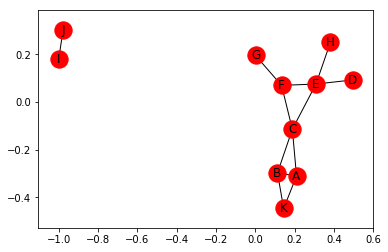

In [30]:
G9 =nx.Graph()
G9.add_edges_from([('A','B'),('A','K'),('A','C'),('B','C'),('B','K'),
                  ('C','E'),('C','F'),('E','F'),('D','E'),('E','H'),('I','J'),('G','F')])
nx.draw_networkx(G9)
plt.show()

$$Transitivity=\frac{3*Number of closed triads}{Number of open triads}$$

In [31]:
nx.transitivity(G9)

0.4090909090909091

In [32]:
#G=nx.Graph()
#G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4)])
#nx.transitivity(G)

### 3.2 Local Clustering Coefficient

In [33]:
nx.clustering(G9)

{'A': 0.6666666666666666,
 'B': 0.6666666666666666,
 'C': 0.3333333333333333,
 'D': 0,
 'E': 0.16666666666666666,
 'F': 0.3333333333333333,
 'G': 0,
 'H': 0,
 'I': 0,
 'J': 0,
 'K': 1.0}

In [34]:
nx.clustering(G9,'F')

0.3333333333333333

In [35]:
nx.clustering(G9)['F']

0.3333333333333333

In [36]:
nx.average_clustering(G9)

0.28787878787878785